# Multiple Blobs

## Imports

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import random as rn
import seaborn as sb
sb.set_style(style="whitegrid")
sb.set_color_codes()
import scipy.ndimage
from scipy.interpolate import griddata
import numpy.ma as ma
from numpy.random import uniform, seed
from google.colab import files

## Data Preparation

### Data Generation

In [ ]:
mean1 = [10, 0]
cov1 = [[1, 0], [0, 1]]  

mean2 = [0, 10]
cov2 = [[1, 0], [0, 1]]

Nobjs = 500          # Size of dataset.
np.random.seed(1)    # Add this for repeatablilty of the experiment. 

x1, y1 = np.random.multivariate_normal(mean1, cov1, int(Nobjs/2)).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, int(Nobjs/2)).T

# join the two clusters so as to make one dataset. 
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
X=np.array([x,y]).T

### Data Visualisation

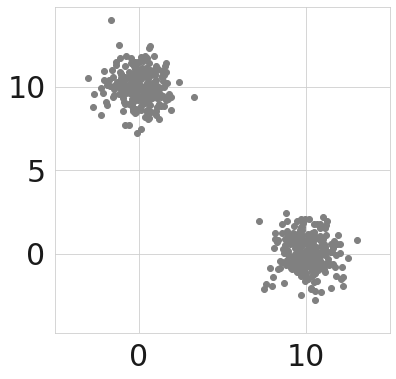

In [ ]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', color=[0.5,0.5,0.5])
plt.grid("off")
plt.axis("equal")

plt.xlim([-5,15])
plt.ylim([-5,15])
plt.tick_params(direction='out', length=6, width=2, colors='k',labelsize=30)

plt.show()

### Save in csv


In [ ]:
label=np.zeros(500, int)
label[0]=1

dict={'1':x, '2':y, 'label':label}
df=pd.DataFrame(dict)

df.to_csv('MultipleBlob.csv', sep='\t')
files.download("MultipleBlob.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Train iForest on Data

This part is done on local machine

## Obtain Anomaly Scores

In [ ]:
files.upload()
files.upload()

Saving MultipleBlob.csviForestAnomalyScore_0.csv to MultipleBlob.csviForestAnomalyScore_0.csv


Saving MultipleBlob.csviForestAnomalyScore_1.csv to MultipleBlob.csviForestAnomalyScore_1.csv


{'MultipleBlob.csviForestAnomalyScore_1.csv': b'pointId Ascore actuallabel\n0 0.492094 1\n1 0.461879 0\n2 0.577299 0\n3 0.516341 0\n4 0.413491 0\n5 0.590068 0\n6 0.422935 0\n7 0.483457 0\n8 0.435847 0\n9 0.430095 0\n10 0.480727 0\n11 0.445286 0\n12 0.441962 0\n13 0.440046 0\n14 0.429453 0\n15 0.432439 0\n16 0.451191 0\n17 0.435918 0\n18 0.460646 0\n19 0.507305 0\n20 0.436635 0\n21 0.4961 0\n22 0.423945 0\n23 0.524127 0\n24 0.431367 0\n25 0.417972 0\n26 0.463896 0\n27 0.430455 0\n28 0.454564 0\n29 0.439187 0\n30 0.462608 0\n31 0.421215 0\n32 0.417102 0\n33 0.515959 0\n34 0.587257 0\n35 0.498029 0\n36 0.440297 0\n37 0.524397 0\n38 0.433029 0\n39 0.435607 0\n40 0.419328 0\n41 0.426332 0\n42 0.414793 0\n43 0.441504 0\n44 0.450838 0\n45 0.454172 0\n46 0.426648 0\n47 0.418034 0\n48 0.423932 0\n49 0.440636 0\n50 0.457179 0\n51 0.430069 0\n52 0.459125 0\n53 0.45018 0\n54 0.423419 0\n55 0.478601 0\n56 0.449165 0\n57 0.46287 0\n58 0.493714 0\n59 0.45016 0\n60 0.429633 0\n61 0.558213 0\n62 0.5478

In [ ]:
data = pd.read_csv("MultipleBlob.csviForestAnomalyScore_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()

data = pd.read_csv("MultipleBlob.csviForestAnomalyScore_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()

print(S0)
print(S0)

[0.517959 0.479168 0.603644 0.535548 0.426639 0.611965 0.432651 0.501763
 0.448227 0.435651 0.486281 0.447765 0.459796 0.451316 0.432529 0.445885
 0.466587 0.447068 0.464389 0.522822 0.450243 0.507179 0.436888 0.557338
 0.437293 0.429702 0.47007  0.432818 0.462048 0.452415 0.475891 0.432087
 0.428969 0.524861 0.616694 0.503606 0.449499 0.55045  0.442235 0.444314
 0.429245 0.432782 0.437387 0.441042 0.456278 0.463274 0.44209  0.428633
 0.436312 0.447747 0.465359 0.438775 0.468291 0.468659 0.43488  0.490674
 0.466285 0.485145 0.521568 0.457223 0.443122 0.581646 0.560562 0.497916
 0.478174 0.438061 0.474145 0.447701 0.471326 0.437271 0.429528 0.457126
 0.434703 0.437726 0.446242 0.615772 0.591736 0.427642 0.430722 0.465917
 0.470819 0.433762 0.426052 0.452688 0.651018 0.450863 0.616746 0.427167
 0.481389 0.434867 0.477    0.475468 0.435273 0.433866 0.430222 0.458096
 0.560106 0.524008 0.432553 0.471762 0.443822 0.528031 0.581432 0.546298
 0.551482 0.509074 0.470211 0.482863 0.437132 0.478

### Visualise Scores

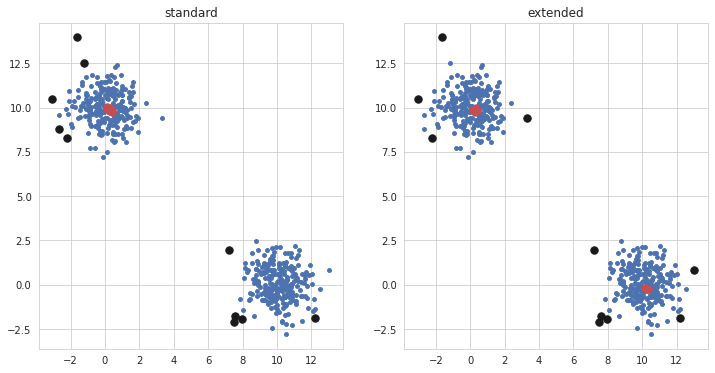

In [ ]:
ss0=np.argsort(S0)
ss1=np.argsort(S1)

f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss0[-10:]],y[ss0[-10:]],s=55,c='k')
plt.scatter(x[ss0[:10]],y[ss0[:10]],s=55,c='r')
plt.title('standard')

plt.subplot(1,2,2)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss1[-10:]],y[ss1[-10:]],s=55,c='k')
plt.scatter(x[ss1[:10]],y[ss1[:10]],s=55,c='r')
plt.title('extended')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


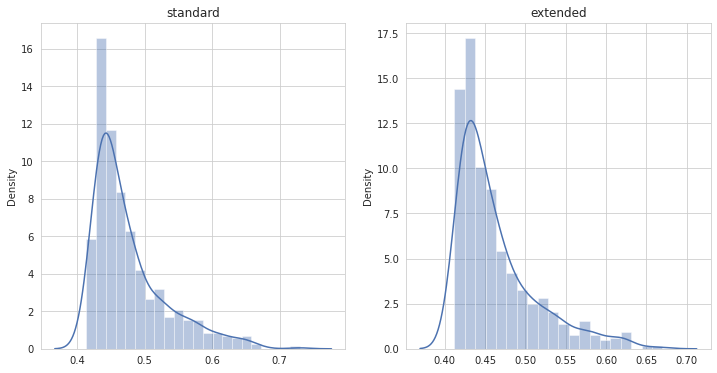

In [ ]:
f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.distplot(S0, kde=True, color="b")
plt.title('standard')

plt.subplot(1,2,2)
sb.distplot(S1, kde=True, color="b")
plt.title('extended')
plt.show()

## Score Map

In [ ]:
xx, yy = np.meshgrid(np.linspace(-5, 15, 30), np.linspace(-5, 15, 30))
X_in=np.c_[xx.ravel(), yy.ravel()]

label=np.zeros(900, int)

dict={'1':X_in[:, 0], '2':X_in[:, 1], 'label':label}
df=pd.DataFrame(dict)

df.to_csv('MultipleBlob_heatmap.csv', sep='\t')
files.download("MultipleBlob_heatmap.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.upload()
files.upload()

Saving heatmap_MultipleBlob.csviForestAnomalyScore_0.csv to heatmap_MultipleBlob.csviForestAnomalyScore_0.csv


Saving heatmap_MultipleBlob.csviForestAnomalyScore_1.csv to heatmap_MultipleBlob.csviForestAnomalyScore_1.csv


{'heatmap_MultipleBlob.csviForestAnomalyScore_1.csv': b'pointId Ascore actuallabel\n0 0.727305 0\n1 0.724469 0\n2 0.724365 0\n3 0.725507 0\n4 0.725642 0\n5 0.724956 0\n6 0.720928 0\n7 0.720236 0\n8 0.718491 0\n9 0.718802 0\n10 0.719142 0\n11 0.712902 0\n12 0.710888 0\n13 0.712288 0\n14 0.708716 0\n15 0.700035 0\n16 0.695087 0\n17 0.693585 0\n18 0.691796 0\n19 0.691577 0\n20 0.685695 0\n21 0.682743 0\n22 0.677643 0\n23 0.671348 0\n24 0.673057 0\n25 0.672768 0\n26 0.678614 0\n27 0.679546 0\n28 0.677469 0\n29 0.676661 0\n30 0.727496 0\n31 0.726494 0\n32 0.726072 0\n33 0.724462 0\n34 0.722558 0\n35 0.722904 0\n36 0.718434 0\n37 0.716337 0\n38 0.715617 0\n39 0.716378 0\n40 0.717812 0\n41 0.714617 0\n42 0.709078 0\n43 0.709214 0\n44 0.703963 0\n45 0.703092 0\n46 0.691064 0\n47 0.686455 0\n48 0.687374 0\n49 0.684312 0\n50 0.678671 0\n51 0.670962 0\n52 0.666553 0\n53 0.654337 0\n54 0.660997 0\n55 0.669917 0\n56 0.676025 0\n57 0.670065 0\n58 0.672465 0\n59 0.674092 0\n60 0.72677 0\n61 0.727954 

In [ ]:
data = pd.read_csv("heatmap_MultipleBlob.csviForestAnomalyScore_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()
S0 = S0.reshape(xx.shape)

data = pd.read_csv("heatmap_MultipleBlob.csviForestAnomalyScore_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()
S1 = S1.reshape(xx.shape)

print(np.min(S0))
print(np.max(S0))

0.42807
0.761399


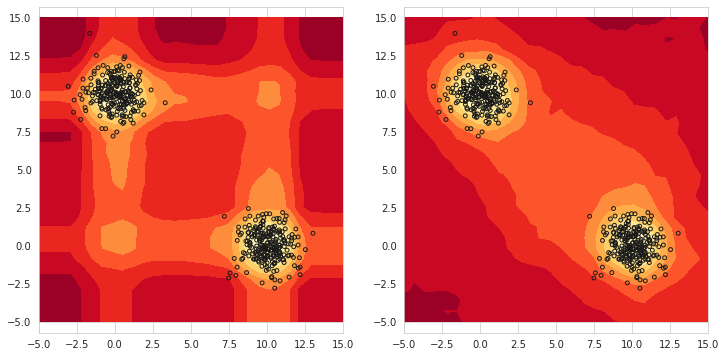

In [ ]:
f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels = np.linspace(np.min(S0),np.max(S0),10)
CS = ax1.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


ax2 = f.add_subplot(122)
levels = np.linspace(np.min(S1),np.max(S0),10)
CS = ax2.contourf(xx, yy, S1, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


plt.show()